## Key Features:


A_id: Unique identifier for each fruit

Size: Size of the fruit

Weight: Weight of the fruit

Sweetness: Degree of sweetness of the fruit

Crunchiness: Texture indicating the crunchiness of the fruit

Juiciness: Level of juiciness of the fruit

Ripeness: Stage of ripeness of the fruit

Acidity: Acidity level of the fruit

Quality: Overall quality of the fruit

## Goal:
teach a model to classify good apples form bad ones with >90% accuracy. 

In [84]:
import pandas as pd
import os

data_path = os.path.join("..", "data", "apple_quality.csv")
apples_data = pd.read_csv(data_path)
apples_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [85]:
apples_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [86]:
apples_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [87]:
apples_data.drop(["A_id"], axis=1, inplace=True)

In [88]:
apples_data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [89]:
apples_data.dropna(inplace=True)
apples_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [90]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

apples_data["Quality"] = label_encoder.fit_transform(apples_data["Quality"])
apples_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Quality'}>, <Axes: >, <Axes: >]],
      dtype=object)

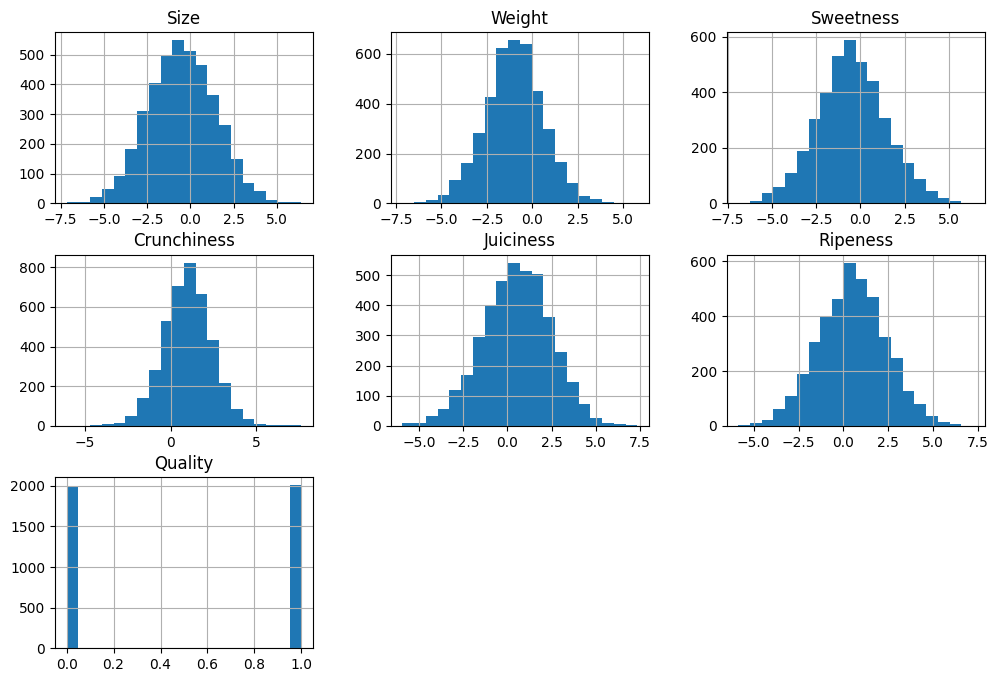

In [91]:
apples_data.hist(figsize=(12, 8), bins=20)

In [92]:
corr_matrix = apples_data.corr()
corr_matrix["Quality"].sort_values(ascending=False)

Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64

array([[<Axes: xlabel='Size', ylabel='Size'>,
        <Axes: xlabel='Weight', ylabel='Size'>,
        <Axes: xlabel='Sweetness', ylabel='Size'>,
        <Axes: xlabel='Crunchiness', ylabel='Size'>,
        <Axes: xlabel='Juiciness', ylabel='Size'>,
        <Axes: xlabel='Ripeness', ylabel='Size'>,
        <Axes: xlabel='Quality', ylabel='Size'>],
       [<Axes: xlabel='Size', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Sweetness', ylabel='Weight'>,
        <Axes: xlabel='Crunchiness', ylabel='Weight'>,
        <Axes: xlabel='Juiciness', ylabel='Weight'>,
        <Axes: xlabel='Ripeness', ylabel='Weight'>,
        <Axes: xlabel='Quality', ylabel='Weight'>],
       [<Axes: xlabel='Size', ylabel='Sweetness'>,
        <Axes: xlabel='Weight', ylabel='Sweetness'>,
        <Axes: xlabel='Sweetness', ylabel='Sweetness'>,
        <Axes: xlabel='Crunchiness', ylabel='Sweetness'>,
        <Axes: xlabel='Juiciness', ylabel='Sweetness'>,
        <Axes:

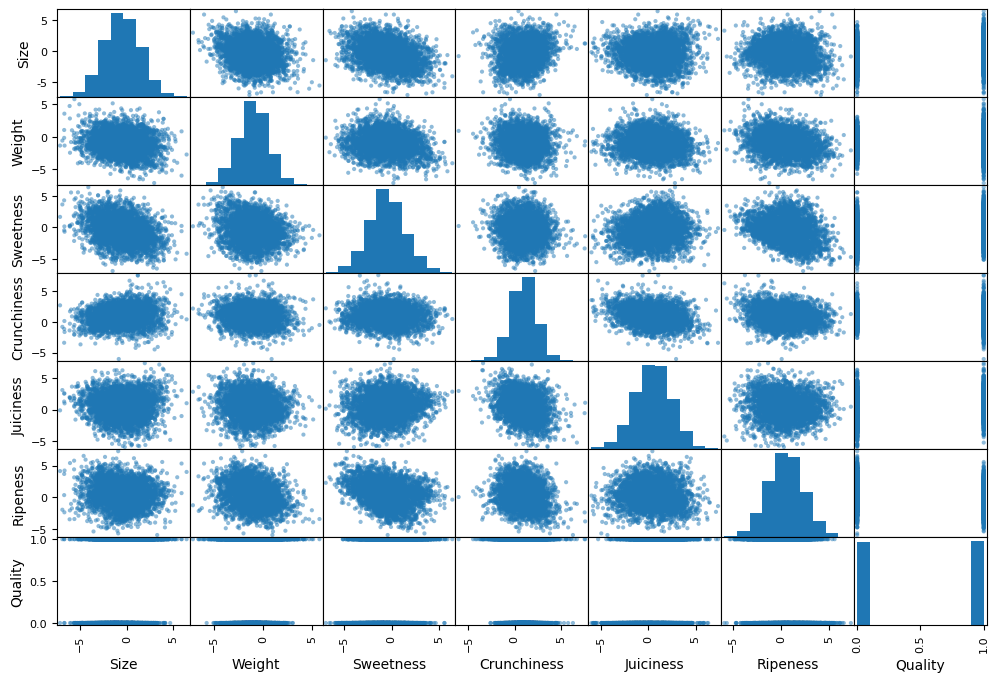

In [93]:
from pandas.plotting import scatter_matrix

scatter_matrix(apples_data, figsize=(12, 8))

<Axes: >

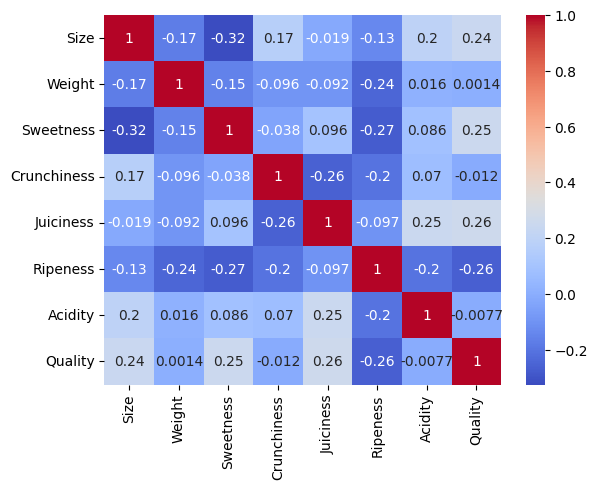

In [94]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

 We can see that the features most correlated with the target variable are 'Size', 'Sweetness', and 'Juiciness' and 'Ripeness'.   
 We will add some dummy variables.


In [95]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))

apples_data_scaled = minmax.fit_transform(apples_data)
apples_data_scaled = pd.DataFrame(apples_data_scaled, columns=apples_data.columns)
apples_data_scaled

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1.0
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1.0
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0.0
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1.0
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1.0
...,...,...,...,...,...,...,...,...
3995,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0.0
3996,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1.0
3997,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0.0
3998,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1.0


In [96]:
apples_data_scaled["Sweetness_per_Ripeness"] = (
    apples_data_scaled["Sweetness"] / apples_data_scaled["Ripeness"]
)
apples_data_scaled["Juiciness_per_Size"] = (
    apples_data_scaled["Juiciness"] / apples_data_scaled["Size"]
)
apples_data_scaled["Acidity_per_Juiciness"] = (
    apples_data_scaled["Acidity"] / apples_data_scaled["Juiciness"]
)
apples_data_scaled["Sweetness_per_Acidity"] = (
    apples_data_scaled["Sweetness"] / apples_data_scaled["Acidity"]
)
apples_data_scaled["Sweetness_per_Size"] = (
    apples_data_scaled["Sweetness"] / apples_data_scaled["Size"]
)
apples_data_scaled["Ripeness_per_Size"] = (
    apples_data_scaled["Ripeness"] / apples_data_scaled["Size"]
)
apples_data_scaled["Ripeness_per_Acidity"] = (
    apples_data_scaled["Ripeness"] / apples_data_scaled["Acidity"]
)
apples_data_scaled["Juiciness_per_Crunchness"] = (
    apples_data_scaled["Juiciness"] / apples_data_scaled["Crunchiness"]
)

In [97]:
corr_matrix = apples_data_scaled.corr()
corr_matrix["Quality"].sort_values(ascending=False)

Quality                     1.000000
Juiciness                   0.260223
Sweetness                   0.250998
Size                        0.244007
Juiciness_per_Crunchness    0.196047
Sweetness_per_Ripeness      0.157133
Sweetness_per_Acidity       0.059013
Sweetness_per_Size          0.015727
Juiciness_per_Size          0.007508
Weight                      0.001421
Acidity                    -0.007697
Crunchiness                -0.012376
Ripeness_per_Acidity       -0.046468
Acidity_per_Juiciness      -0.109346
Ripeness_per_Size          -0.224296
Ripeness                   -0.264315
Name: Quality, dtype: float64

Dummy variables have proven unhelpful.

In [98]:
apples_data_scaled.drop(
    [
        "Sweetness_per_Ripeness",
        "Juiciness_per_Size",
        "Acidity_per_Juiciness",
        "Sweetness_per_Acidity",
        "Sweetness_per_Size",
        "Ripeness_per_Size",
        "Ripeness_per_Acidity",
        "Juiciness_per_Crunchness",
    ],
    axis=1,
    inplace=True,
)
apples_data_scaled

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1.0
1,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1.0
2,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0.0
3,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1.0
4,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1.0
...,...,...,...,...,...,...,...,...
3995,0.531867,0.470029,0.239644,0.477379,0.574794,0.618866,0.495885,0.0
3996,0.505867,0.703146,0.504203,0.395971,0.449218,0.364566,0.614957,1.0
3997,0.333173,0.387278,0.335661,0.490846,0.612443,0.811182,0.393744,0.0
3998,0.231869,0.415014,0.697913,0.428137,0.609571,0.463966,0.331650,1.0


In [99]:
from sklearn.model_selection import train_test_split

X = apples_data_scaled.drop("Quality", axis=1)
y = apples_data_scaled["Quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [100]:
from sklearn.linear_model import LogisticRegression

example_log_reg = LogisticRegression()
example_log_reg

LogisticRegression()

In [101]:
from sklearn.metrics import accuracy_score

example_log_reg.fit(X_train, y_train)

y_pred_train = example_log_reg.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7471875

In [102]:
y_pred_test = example_log_reg.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.75625

In [103]:
import joblib

example_log_reg_model_path = os.path.join("..", "models", "apple_quality_example_log_reg.pkl")
joblib.dump(example_log_reg, example_log_reg_model_path)

['..\\models\\apple_quality_example_log_reg.pkl']

In [104]:
from sklearn.neighbors import KNeighborsClassifier

example_knn = KNeighborsClassifier(n_neighbors=5)

example_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
knn_pred_train = example_knn.predict(X_train)
accuracy_score(y_train, knn_pred_train)

0.934375

In [106]:
knn_pred_test = example_knn.predict(X_test)
accuracy_score(y_test, knn_pred_test)

0.89875

In [107]:
example_knn_model_path = os.path.join("..", "models", "apple_quality_example_knn.pkl")
joblib.dump(example_knn, example_knn_model_path)

['..\\models\\apple_quality_example_knn.pkl']

In [108]:
from sklearn.linear_model import SGDClassifier

example_sgd = SGDClassifier()

example_sgd.fit(X_train, y_train)

SGDClassifier()

In [109]:
example_sgd_pred_train = example_sgd.predict(X_train)
accuracy_score(y_train, example_sgd_pred_train)

0.7128125

In [110]:
example_sgd_pred_test = example_sgd.predict(X_test)
accuracy_score(y_test, example_sgd_pred_test)

0.72875

In [111]:
example_sgd_model_path = os.path.join("..", "models", "apple_quality_example_sgd.pkl")
joblib.dump(example_sgd, example_sgd_model_path)

['..\\models\\apple_quality_example_sgd.pkl']

In [112]:
from sklearn.tree import DecisionTreeClassifier

example_tree = DecisionTreeClassifier()

example_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
tree_pred_train = example_tree.predict(X_train)
accuracy_score(y_train, tree_pred_train)

1.0

In [114]:
tree_pred_test = example_tree.predict(X_test)
accuracy_score(y_test, tree_pred_test)

0.8025

A wee bit overfitted

In [115]:
example_tree_model_path = os.path.join("..", "models", "apple_quality_example_tree.pkl")
joblib.dump(example_tree, example_tree_model_path)

['..\\models\\apple_quality_example_tree.pkl']

In [116]:
from sklearn.naive_bayes import GaussianNB

example_nb = GaussianNB()

example_nb.fit(X_train, y_train)

GaussianNB()

In [117]:
example_nb_pred_train = example_nb.predict(X_train)
accuracy_score(y_train, example_nb_pred_train)

0.7503125

In [118]:
example_nb_pred_test = example_nb.predict(X_test)
accuracy_score(y_test, example_nb_pred_test)

0.7625

In [119]:
example_nb_model_path = os.path.join("..", "models", "apple_quality_example_nb.pkl")
joblib.dump(example_nb, example_nb_model_path)

['..\\models\\apple_quality_example_nb.pkl']

I expected more

In [120]:
from sklearn.svm import SVC

example_svm = SVC()

example_svm.fit(X_train, y_train)

SVC()

In [121]:
example_svm_pred_train = example_svm.predict(X_train)
accuracy_score(y_train, example_svm_pred_train)

0.901875

In [122]:
example_svm_pred_test = example_svm.predict(X_test)
accuracy_score(y_test, example_svm_pred_test)

0.90625

In [123]:
example_svm_model_path = os.path.join("..", "models", "apple_quality_example_svm.pkl")
joblib.dump(example_svm, example_svm_model_path)

['..\\models\\apple_quality_example_svm.pkl']

That's what im talking about

In [124]:
from sklearn.ensemble import RandomForestClassifier

example_rf = RandomForestClassifier()

example_rf.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
example_rf_pred_train = example_rf.predict(X_train)
accuracy_score(y_train, example_rf_pred_train)

1.0

In [126]:
example_rf_pred_test = example_rf.predict(X_test)
accuracy_score(y_test, example_rf_pred_test)

0.8975

In [127]:
example_rf_model_path = os.path.join("..", "models", "apple_quality_example_rf.pkl")
joblib.dump(example_rf, example_rf_model_path)

['..\\models\\apple_quality_example_rf.pkl']

In [128]:
import xgboost as xgb

example_xgb = xgb.XGBClassifier()

example_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
example_xgb_pred_train = example_xgb.predict(X_train)
accuracy_score(y_train, example_xgb_pred_train)

1.0

In [130]:
example_xgb_pred_test = example_xgb.predict(X_test)
accuracy_score(y_test, example_xgb_pred_test)

0.90625

In [131]:
example_xgb_model_path = os.path.join("..", "models", "apple_quality_example_xgb.pkl")
joblib.dump(example_xgb, example_xgb_model_path)

['..\\models\\apple_quality_example_xgb.pkl']

Now that we have an idea witch o models work with our data we can find the best one.
We will find the best parameters for KNN, SVC, GXB, and RF.

In [132]:
from sklearn.model_selection import RandomizedSearchCV

knn_param_dist = {
    "n_neighbors": range(1, 20),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": range(10, 60),
    "p": [1, 2],
}

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(), knn_param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
knn_random_search.fit(X_train, y_train)
best_knn = knn_random_search.best_estimator_
best_knn

c:\Users\Dominik\my_repos\Apples_Quality_Classification\venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNeighborsClassifier(algorithm='brute', leaf_size=41, n_neighbors=12,
                     weights='distance')

In [133]:
best_knn_pred_train = best_knn.predict(X_train)
accuracy_score(y_train, best_knn_pred_train)

1.0

In [134]:
best_knn_pred_test = best_knn.predict(X_test)
accuracy_score(y_test, best_knn_pred_test)

0.90125

This is great

In [135]:
best_knn_model_path = os.path.join("..", "models", "apple_quality_best_knn.pkl")
joblib.dump(best_knn, best_knn_model_path)

['..\\models\\apple_quality_best_knn.pkl']

In [138]:
from scipy.stats import uniform
import numpy as np

svm_param_dist = {
    "C": uniform(0.1, 10),
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 50)),
}

svm_random_search = RandomizedSearchCV(
    SVC(), svm_param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42
)
svm_random_search.fit(X_train, y_train)
best_svm = svm_random_search.best_estimator_
best_svm

SVC(C=np.float64(4.692488919658671), gamma=np.float64(10.985411419875572))

In [139]:
best_svm_pred_train = best_svm.predict(X_train)
accuracy_score(y_train, best_svm_pred_train)

0.9365625

In [140]:
best_svm_pred_test = best_svm.predict(X_test)
accuracy_score(y_test, best_svm_pred_test)

0.93125

In [141]:
best_svm_model_path = os.path.join("..", "models", "apple_quality_best_svm.pkl")
joblib.dump(best_svm, best_svm_model_path)

['..\\models\\apple_quality_best_svm.pkl']

In [149]:
from scipy.stats import randint

rf_param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 30),
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "bootstrap": [True, False],
}
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(), rf_param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42
)
rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=27, max_features=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=369)

In [150]:
best_rf_pred_train = best_rf.predict(X_train)
accuracy_score(y_train, best_rf_pred_train)

0.994375

In [151]:
best_rf_pred_test = best_rf.predict(X_test)
accuracy_score(y_test, best_rf_pred_test)

0.90375

In [152]:
best_rf_model_path = os.path.join("..","models", "apple_quality_best_rf.pkl")
joblib.dump(best_rf, best_rf_model_path)

['..\\models\\apple_quality_best_rf.pkl']

In [154]:
xgb_param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(3, 10) ,
    "learning_rate": uniform(0.01, 0.3),
    "subsample": uniform(0.3, 0.7),
    "colsample_bytree": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.3),
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    param_distributions=xgb_param_dist,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

xgb_random_search.fit(X_train, y_train)
best_xgb = xgb_random_search.best_estimator_
best_xgb

c:\Users\Dominik\my_repos\Apples_Quality_Classification\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7282970263056656), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=np.float64(0.04184815819561255), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.09764339456056544), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
best_xgb_pred_train = best_xgb.predict(X_train)
accuracy_score(y_train, best_xgb_pred_train)

0.99375

In [156]:
best_xgb_pred_test = best_xgb.predict(X_test)
accuracy_score(y_test, best_xgb_pred_test)

0.90625

In [157]:
best_xgb_model_path = os.path.join("..", "models", "apple_quality_best_xgb.pkl")
joblib.dump(best_xgb, best_xgb_model_path)

['..\\models\\apple_quality_best_xgb.pkl']

In [160]:
def make_performence_df(models_dict, train_data, train_labels, test_data, test_labels):
    performance = []

    for model, model_name in models_dict.items():
        train_predictions = model.predict(train_data)
        test_predictions = model.predict(test_data)
        train_accuracy = accuracy_score(train_labels, train_predictions)
        test_accuracy = accuracy_score(test_labels, test_predictions)
        performance.append(
            {
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
            }
        )
    performance = pd.DataFrame(performance)
    performance.sort_values(by="Test Accuracy", ascending=False, inplace=True)

    return performance

In [161]:
models_dict = {
    best_knn: "Best KNN",
    best_svm: "Best SVM",
    best_rf: "Best Random Forest",
    best_xgb: "Best XGBoost",
}

performance_df = make_performence_df(models_dict, X_train, y_train, X_test, y_test)
performance_df

,Model,Train Accuracy,Test Accuracy
1,Best SVM,0.936562,0.93125
3,Best XGBoost,0.993750,0.90625
2,Best Random Forest,0.994375,0.90375
0,Best KNN,1.000000,0.90125


# Conclusion
### The best model turned out to be the SVMClassifier